In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
data = pd.read_csv('./housingdata.csv')

In [23]:
data.info()
dic = {'Accuracy':[],'Model' : [], 'AccM' : []}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [24]:
df = data[['MEDV','LSTAT']].dropna()

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']

In [ ]:
#이상치 탐지 및 제거


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([17.55331451, 27.46525992, 16.34313513, 18.41772836, 12.13632109,
       22.07708029, 30.50991757, 27.15791278, 19.95446408, 28.78108988,
       15.24821093, 30.26019801, 20.386671  , 25.47710808, 12.47248203,
       19.09965483, 29.41499337, 22.36521824, 30.46189458, 28.50255653,
       27.40763233, 17.28438576, 16.96743402, 21.12622507, 15.35386151,
       29.60708533, 28.29125537,  6.38316673, 27.95509443, 29.58787614,
       23.39291026, 27.30198175, 19.3013514 , 28.43532434, 30.10652444,
       19.80079051, 22.48047342, 27.65735189, 21.98103431,  9.51426577,
       17.54370991, 21.91380212, 31.09579806,  5.50914829, 24.05562754,
       30.40426699, 28.43532434, 31.85456133, 20.87650551, 30.24098882,
       25.72682763, 16.94822482, 27.79181626, 19.24372381, 30.37545319,
       30.50991757, 18.89795827,  6.98825642, 14.58549365, 11.86739234,
       18.61942492, 21.34713083, 28.47374274,  1.87861015, 27.0138438 ,
       31.4607728 , 22.78782057, 22.53810101, 23.61381602, 25.14

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dic['Model'] += ['LinearR.']*3
dic['Accuracy'] += mae, mse, r2
dic['AccM'] += ['mae', 'mse', 'r2']

In [33]:
#데이터 초기화
data = pd.read_csv('./housingdata.csv')

In [34]:
df = data[['MEDV','LSTAT','CRIM','ZN','INDUS','CHAS','RM','AGE','DIS','TAX','PTRATIO','RAD','B']].dropna()

In [35]:
from sklearn.tree import DecisionTreeRegressor
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
# 데이터 스케일링

model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dic['Model'] += ['DecisionT.R.']*3
dic['Accuracy'] += mae, mse, r2
dic['AccM'] += ['mae', 'mse', 'r2']

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
X = df.drop(['MEDV'],axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dic['Model'] += ['RandomF.R.']*3
dic['Accuracy'] += mae, mse, r2
dic['AccM'] += ['mae', 'mse', 'r2']

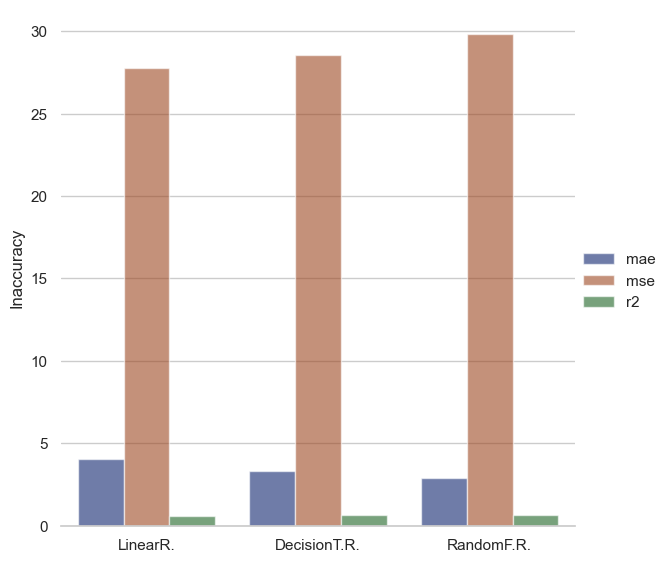

In [39]:
# 그래프 생성
import seaborn as sns
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dic, kind="bar",
    x="Model", y="Accuracy", hue="AccM",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Inaccuracy")
g.legend.set_title("")